<a href="https://colab.research.google.com/github/surya81/NLP/blob/main/twitter_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
!pip3 install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
from datasets import list_datasets
all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 8111 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [76]:
from datasets import load_dataset
emotions = load_dataset('emotion')

Using custom data configuration default
Reusing dataset emotion (/root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

In [77]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [78]:
train_ds = emotions["train"]

In [79]:
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [80]:
train_ds[0]

{'label': 0, 'text': 'i didnt feel humiliated'}

In [81]:
train_ds.column_names

['text', 'label']

In [82]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


#From dataset to Dataframe

In [83]:
import pandas as pd 
emotions.set_format(type ="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


#Frm intr to str

In [84]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)

In [85]:
df["label_name"] = df["label"].apply(label_int2str)

In [86]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


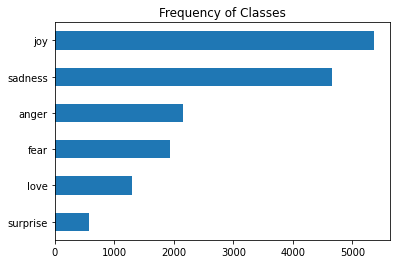

In [87]:
import matplotlib.pyplot as plt
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


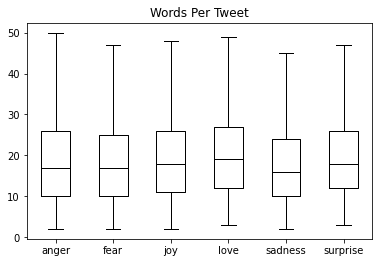

In [88]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()
emotions.reset_format()

#character tokenization example 

In [89]:
text = "My name is surya prakash"
tokenized_text = list(text)
print(tokenized_text)

['M', 'y', ' ', 'n', 'a', 'm', 'e', ' ', 'i', 's', ' ', 's', 'u', 'r', 'y', 'a', ' ', 'p', 'r', 'a', 'k', 'a', 's', 'h']


Numericalization

In [90]:
token2idx = {ch:idx for idx ,ch in(enumerate(sorted(tokenized_text)))}
token2idx 

{' ': 3,
 'M': 4,
 'a': 8,
 'e': 9,
 'h': 10,
 'i': 11,
 'k': 12,
 'm': 13,
 'n': 14,
 'p': 15,
 'r': 17,
 's': 20,
 'u': 21,
 'y': 23}

In [91]:
inputids = [token2idx[token] for token in tokenized_text]
inputids

[4,
 23,
 3,
 14,
 8,
 13,
 9,
 3,
 11,
 20,
 3,
 20,
 21,
 17,
 23,
 8,
 3,
 15,
 17,
 8,
 12,
 8,
 20,
 10]

#one hot vectorization 

In [92]:
import torch 
import torch.nn.functional as F 
device = "cuda" if torch.cuda.is_available() else "cpu"
inputids = torch.tensor(inputids)

In [93]:
one_hot_encoder = F.one_hot(inputids,num_classes=len(tokenized_text))

In [94]:
one_hot_encoder

tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0

# Word tokenization

In [95]:
tokenized_text = text.split()
print(tokenized_text)

['My', 'name', 'is', 'surya', 'prakash']


In [96]:
token2idx = {ch:idx for idx ,ch in(enumerate(sorted(tokenized_text)))}
token2idx

{'My': 0, 'is': 1, 'name': 2, 'prakash': 3, 'surya': 4}

In [97]:
inputids = [token2idx[token] for token in tokenized_text]
inputids

[0, 2, 1, 4, 3]

In [98]:
inputids = torch.tensor(inputids)
one_hot_encoder = F.one_hot(inputids,num_classes=len(tokenized_text))
one_hot_encoder

tensor([[1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0]])

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix 

In [100]:
def plot_confusion_matrix(y_preds,y_true,labels):
  cm = confusion_matrix(y_true,y_preds,normalize = True)
  fig,ax = plt.subplots(figsize =(6,6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
  plt.title("Normalized Confusion matrix")
  plt.show()

In [101]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
# auto tokenizer from hugging face to tokenize 
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# tokenizing the whole dataset

In [102]:
def tokenize(batch):
  return tokenizer(batch["text"],padding =True,truncation=True)

In [103]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [104]:
emotions_encoded = emotions.map(tokenize,batched=True,batch_size =None)
print(emotions_encoded["train"].column_names)

Loading cached processed dataset at /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705/cache-65a9ae854a6c1534.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705/cache-b4f92fe161a6e4fa.arrow
Loading cached processed dataset at /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705/cache-7506851dd76e4bce.arrow


['text', 'label', 'input_ids', 'attention_mask']


In [105]:
train_ds = emotions_encoded["train"]
train_ds[1]

{'attention_mask': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'input_ids': [101,
  1045,
  2064,
  2175,
  2013,
  3110,
  2061,
  20625,
  2000,
  2061,
  9636,
  17772,
  2074,
  2013,
  2108,
  2105,
  2619,
  2040,
  14977,
  1998,
  2003,
  8300,
  102,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'label': 0,
 'text': 'i ca

#Load pre-trained model

In [106]:
from transformers import AutoModelForSequenceClassification
num_labels = 6 
Model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels = num_labels)).to(device)

In [107]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}

In [108]:
from huggingface_hub import notebook_login
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [112]:
from transformers import Trainer , TrainingArguments
batch_size = 64
logging_steps = len(emotions_encoded["train"])
model_name = f"{model_ckpt}-finetuned-emotions"


In [113]:
training_args = TrainingArguments(output_dir=model_name,
num_train_epochs=2,
learning_rate=2e-5,
per_device_train_batch_size=batch_size,
per_device_eval_batch_size=batch_size,
weight_decay=0.01,
evaluation_strategy="epoch",
disable_tqdm=False,
logging_steps=logging_steps,
push_to_hub=True,
log_level="error")

In [114]:
from transformers import Trainer
trainer = Trainer(model=Model, args=training_args,
compute_metrics=compute_metrics,
train_dataset=emotions_encoded["train"],
eval_dataset=emotions_encoded["validation"],
tokenizer=tokenizer)

Cloning https://huggingface.co/youknowsurya/distilbert-base-uncased-finetuned-emotions into local empty directory.


In [115]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.327543,0.904000,0.901081
2,No log,0.230055,0.917500,0.917868


TrainOutput(global_step=500, training_loss=0.54791845703125, metrics={'train_runtime': 240.966, 'train_samples_per_second': 132.799, 'train_steps_per_second': 2.075, 'total_flos': 720342861696000.0, 'train_loss': 0.54791845703125, 'epoch': 2.0})

In [116]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [117]:
preds_output.metrics

{'test_accuracy': 0.9175,
 'test_f1': 0.917868093658934,
 'test_loss': 0.2300547957420349,
 'test_runtime': 4.4489,
 'test_samples_per_second': 449.545,
 'test_steps_per_second': 7.193}